In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) =fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

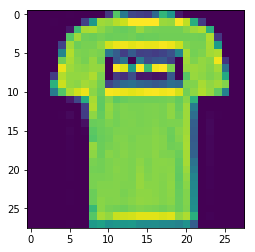

In [43]:
plt.imshow(train_images[1])

In [5]:
train_images = train_images /255.0
test_images = test_images / 255.0

In [6]:
model = keras.Sequential([keras.layers.Flatten(),
                         keras.layers.Dense(128, activation=tf.nn.tanh),
                         keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
model = keras.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                         keras.layers.MaxPooling2D(),
                         keras.layers.Flatten(),
                         keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4791 - acc: 0.8278
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3698 - acc: 0.8669
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3341 - acc: 0.8787
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3121 - acc: 0.8847
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2959 - acc: 0.8899
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2795 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2673 - acc: 0.8992
Epoch 8/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.2576 - acc: 0.9038
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2576 - acc: 0.9037


In [10]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3627 - acc: 0.8717


[0.3626668454647064, 0.8717]

In [20]:
classifications = model.predict(test_images)

print(classifications[0])


[1.7718476e-07 3.9379978e-11 1.5159889e-10 1.9970893e-11 2.0600062e-09
 6.7484524e-04 1.7567022e-08 4.6549826e-03 5.7722122e-08 9.9466997e-01]
